# Python Exercises for Hughes and Hase:Chapter 5

Python activities to complement Measurements and their Uncertainties, Chapter 5, "Data visualization and reduction." Section numbers in the book correspond to those listed below.

Author: J. S. Dodge, 2016
## 5.1 Producing a good graph
## 5.1.1 The independent and dependent variables

Consider the data tabulated in Prob. (5.3), taken from an experiment to verify Ohm's law.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

current = np.arange(10, 100, 10)    # (uA)
voltage = np.array([0.98, 1.98, 2.98, 3.97, 4.95, 5.95, 6.93, 7.93, 8.91])   # (mV)


The problem states that the voltmeter precision is 0.01 mV, and that the uncertainty in the current is negligible. This suggests we use the current as the independent variable. Plot data points using markers. 
<--- link to 'plot documentation' --->
Python provides several choices; see the plot documentation. Use black circles (ko) here. 

Text(0, 0.5, 'Voltage (mV)')

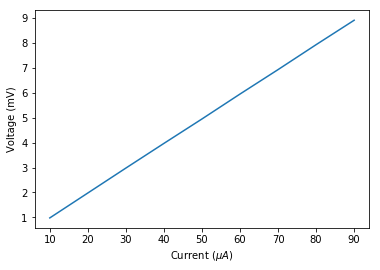

In [11]:
plt.plot(current, voltage)
plt.xlabel('Current ($\mu A$)')
plt.ylabel('Voltage (mV)')

Linearizing a graph can be a very effective way to demonstrate the validity of certain functional relationships between two quantities. Consider first the example given in the text, the period $T$ of a pendulum as a function of its length $L$. Use the random number generator to simulate period measurements with a constant standard error $\alpha_T = 0.03$ s, with pendulum lengths ranging from 10 cm to 100 cm. Use T for the model prediction, and Tm for the simulated measurements. 

Text(0, 0.5, 'Period (s)')

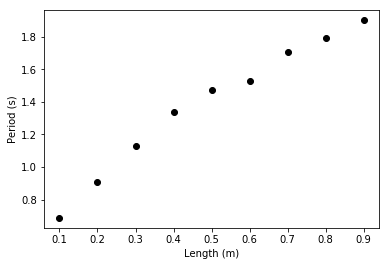

In [19]:
L = np.arange(0.1, 1.0, 0.1)  # (m)
g = 9.8 # (m/s^2)
T = 2 * np.pi * np.sqrt(L/g)  # (s)

np.random.seed(0)
alpha_t = 0.03

Tm = T + alpha_t * np.random.randn(np.size(T))

plt.plot(L,Tm,'ko');
plt.xlabel('Length (m)')
plt.ylabel('Period (s)')

Yet another way to linearize the same data is to use a *loglog plot*. These are useful for identifying a power-law relationship between two quantities, i.e.,

$$y = A x^\alpha $$

where $A$ and $\alpha$ are unknown. Taking the logarithm of both sides yields a linear relatonship between $y$ and $x$:
$$log y = log A + \alpha \log x $$

Use *loglog* to demonstrate this with the *L*, *Tm* data. Show the data as black circles (ko), and add a red line (r-) to show the model behavior, *T*, and a blue dashed line (b--) to show sqrt(L), to demonstrate the advantage of using *loglog* to identify a power-law functional dependence. The data fall approximately on a straight line, with a *slope* similar to the plot of *sqrt(L)* versus *L*.

Text(0, 0.5, 'Period (s)')

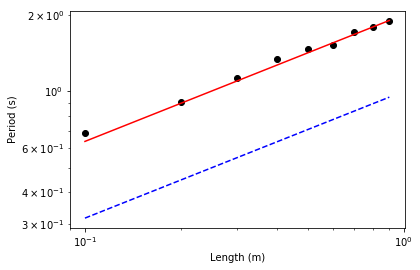

In [21]:
plt.loglog(L, Tm, 'ko', L, T, 'r-', L, np.sqrt(L), 'b--')
plt.xlabel('Length (m)')
plt.ylabel('Period (s)')

Yet another common linearization method uses the *semilogx* and *semilogy* functions, which is useful to demonstrate an *exponential* functional dependence. Consider, for example, the voltage across a 47 nF capacitor as it discharges from an initial value of 1 V across a 100 kOhm resistor. Add noise with a 10 microvolt amplitude using the random number generator.

In [27]:
x = np.linspace(0,100)    # s
R = 100e3             # Ohm
C = 47e-9             # Farad
tau = R * C * 1000         # ms
V0 = 1                 # V
alphaV = 10e-6         # V

V = V0*np.exp(-x/tau)
Vm = V + alphaV*np.random.randn(np.size(V))

First plot the data using linear scales.

Text(0, 0.5, 'Voltage (V)')

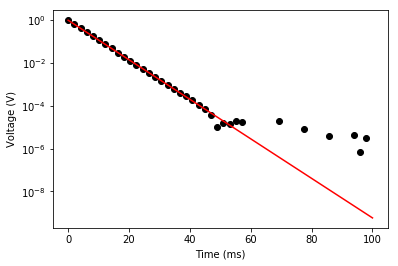

In [28]:
plt.semilogy(x,Vm,'ko',x,V,'r-')
plt.xlabel('Time (ms)')
plt.ylabel('Voltage (V)')